<a href="https://colab.research.google.com/github/jaanhavigautam666/Blood-Donation-Analysis/blob/main/Blood_Donation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
training_dataset = pd.read_csv("blood-train.csv")
test_dataset = pd.read_csv("blood-test.csv")

In [70]:
training_dataset.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [71]:
test_dataset.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [72]:
Y= training_dataset.iloc[:,-1]

In [73]:
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [75]:
old_training_dataset = training_dataset.iloc[:,:]

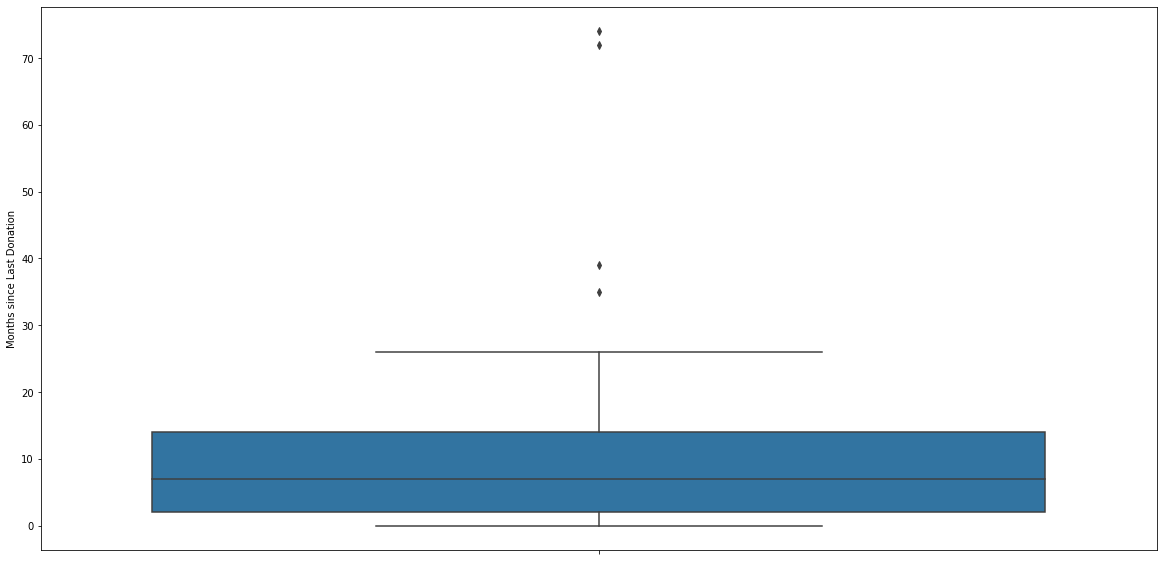

In [77]:
import seaborn as sns
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Months since Last Donation",data=old_training_dataset)

In [78]:
training_dataset=training_dataset.iloc[:,1:5]
test_dataset=test_dataset.iloc[:,1:5]
X = pd.merge(training_dataset,test_dataset)
X.tail()


,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
805,16,2,500,16
806,16,2,500,16
807,16,3,750,21
808,14,3,750,35
809,21,3,750,38


In [79]:
X.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,810.000000,810.000000,810.000000,810.000000
mean,7.035802,1.177778,294.444444,7.927160
std,6.198405,0.629321,157.330166,7.752882
min,2.000000,1.000000,250.000000,2.000000
25%,2.500000,1.000000,250.000000,4.000000
50%,4.000000,1.000000,250.000000,4.000000
75%,11.000000,1.000000,250.000000,11.000000
max,23.000000,7.000000,1750.000000,76.000000


In [80]:
test_dataset.tail()
test_dataset.shape

(200, 4)

In [81]:
training_dataset.tail()
training_dataset.shape

(576, 4)

In [82]:
X.shape

(810, 4)

In [83]:
Y.shape

(576,)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(training_dataset,Y,test_size=0.25,random_state=1) 

In [46]:
X_train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
187,8,8,2000,52
425,2,4,1000,23
422,4,4,1000,16
347,21,1,250,21
366,14,3,750,83


In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
print(classifier.predict(sc.transform([[2,4,1000,23]])))

[0]


In [52]:
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[110   4]
 [ 25   5]]


0.7986111111111112

In [55]:
from sklearn.svm import SVC
classifier = SVC( kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
print(classifier.predict(sc.transform([[2,4,1000,23]])))

[0]


In [57]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[114   0]
 [ 30   0]]


0.7916666666666666

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'entropy',random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
print(classifier.predict(sc.transform([[2,4,1000,23]])))

[0]


In [61]:
y_pred = classifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[92 22]
 [16 14]]


0.7361111111111112

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [65]:
print(classifier.predict(sc.transform([[2,4,1000,23]])))

[0]


In [66]:
y_pred = classifier.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[91 23]
 [16 14]]


0.7291666666666666